# NGC 3201 Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
%matplotlib inline 

In [2]:
target = 'NGC5904'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '15:18:33.22'
cluster_dec = '02:04:51.7'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

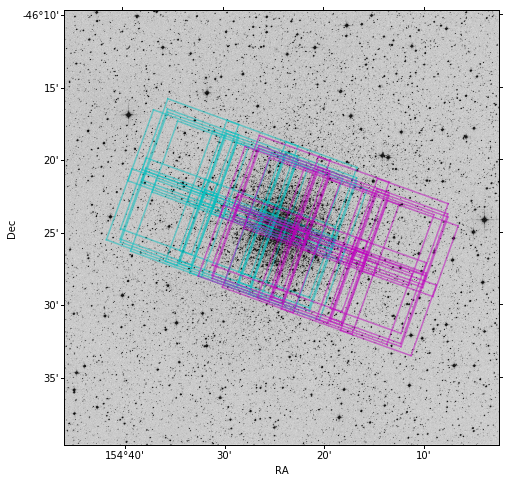

In [4]:
from matplotlib.colors import LogNorm
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC3201...
Finished reading optical catalog.


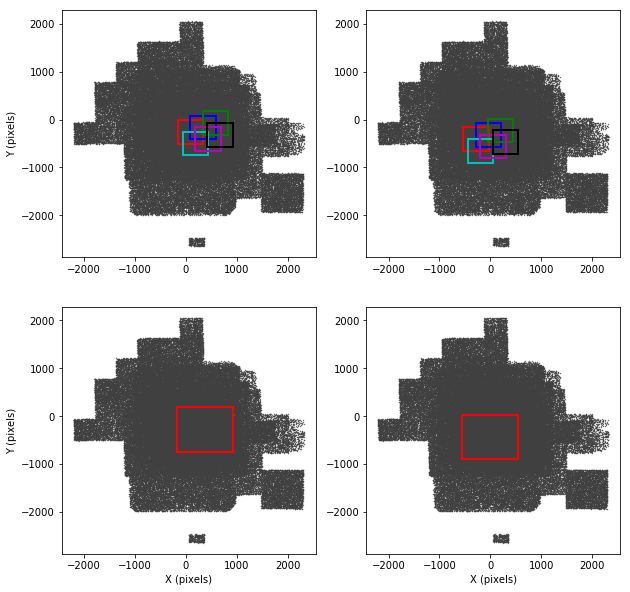

In [6]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax3.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax4.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'I2-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(I1cuts['xmin'])):
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmax'][ind]], [I1cuts['ymin'][ind], I1cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmax'][ind]], [I1cuts['ymax'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmin'][ind]], [I1cuts['ymin'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmax'][ind], I1cuts['xmax'][ind]], [I1cuts['ymin'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
ax1.set_ylabel('Y (pixels)')
for ind in range(len(I1cuts['xmin'])):
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmax'][ind]], [I2cuts['ymin'][ind], I2cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmax'][ind]], [I2cuts['ymax'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmin'][ind]], [I2cuts['ymin'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmax'][ind], I2cuts['xmax'][ind]], [I2cuts['ymin'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)

## Mosaics
I2mcuts = np.loadtxt(folder+'I2-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I1mcuts = np.loadtxt(folder+'I1-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

colors=['r']
ind=0
ax3.plot([I1mcuts['xmin'], I1mcuts['xmax']], [I1mcuts['ymin'], I1mcuts['ymin']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmin'], I1mcuts['xmax']], [I1mcuts['ymax'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmin'], I1mcuts['xmin']], [I1mcuts['ymin'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmax'], I1mcuts['xmax']], [I1mcuts['ymin'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.set_xlabel('X (pixels)')
ax3.set_ylabel('Y (pixels)')
ax4.plot([I2mcuts['xmin'], I2mcuts['xmax']], [I2mcuts['ymin'], I2mcuts['ymin']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmin'], I2mcuts['xmax']], [I2mcuts['ymax'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmin'], I2mcuts['xmin']], [I2mcuts['ymin'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmax'], I2mcuts['xmax']], [I2mcuts['ymin'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.set_xlabel('X (pixels)')
mp.show()

#### Check transformed catalogs

Reading optical catalog for NGC3201...
Finished reading optical catalog.


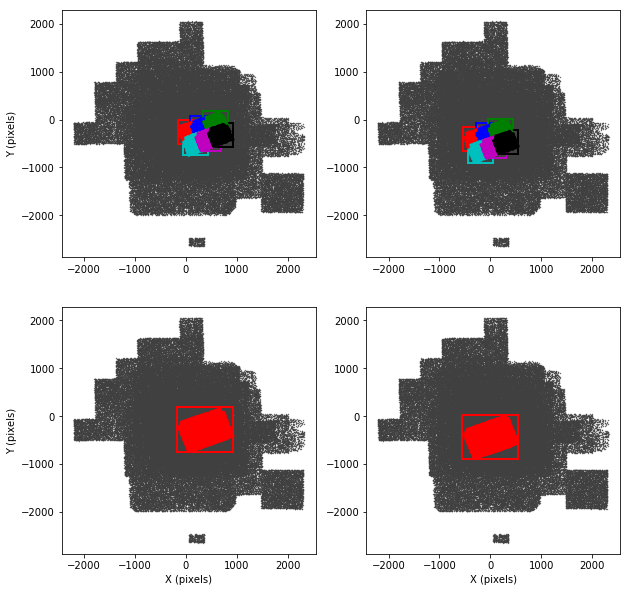

In [7]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax3.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax4.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'I2-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(I1cuts['xmin'])):
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmax'][ind]], [I1cuts['ymin'][ind], I1cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmax'][ind]], [I1cuts['ymax'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmin'][ind], I1cuts['xmin'][ind]], [I1cuts['ymin'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax1.plot([I1cuts['xmax'][ind], I1cuts['xmax'][ind]], [I1cuts['ymin'][ind], I1cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
ax1.set_ylabel('Y (pixels)')
for ind in range(len(I1cuts['xmin'])):
    IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_field'+str(ind+1)+'.mag')
    files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-f'+str(ind+1)+'.mch')
    x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
    y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
    ax1.plot(x, y, '.', markersize=1.8, color=colors[ind])
for ind in range(len(I1cuts['xmin'])):
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmax'][ind]], [I2cuts['ymin'][ind], I2cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmax'][ind]], [I2cuts['ymax'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmin'][ind], I2cuts['xmin'][ind]], [I2cuts['ymin'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    ax2.plot([I2cuts['xmax'][ind], I2cuts['xmax'][ind]], [I2cuts['ymin'][ind], I2cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
for ind in range(len(I2cuts['xmin'])):
    IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I2_field'+str(ind+1)+'.mag')
    files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I2-f'+str(ind+1)+'.mch')
    x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
    y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
    ax2.plot(x, y, '.', markersize=1.8, color=colors[ind])
    
## Mosaics
I2mcuts = np.loadtxt(folder+'I2-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I1mcuts = np.loadtxt(folder+'I1-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

colors=['r']
ind=0
ax3.plot([I1mcuts['xmin'], I1mcuts['xmax']], [I1mcuts['ymin'], I1mcuts['ymin']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmin'], I1mcuts['xmax']], [I1mcuts['ymax'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmin'], I1mcuts['xmin']], [I1mcuts['ymin'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.plot([I1mcuts['xmax'], I1mcuts['xmax']], [I1mcuts['ymin'], I1mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax3.set_xlabel('X (pixels)')
ax3.set_ylabel('Y (pixels)')
IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_mosaic.mag')
files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-mosaics.mch')
x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
ax3.plot(x, y, '.', markersize=1.8, color=colors[ind])
ax4.plot([I2mcuts['xmin'], I2mcuts['xmax']], [I2mcuts['ymin'], I2mcuts['ymin']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmin'], I2mcuts['xmax']], [I2mcuts['ymax'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmin'], I2mcuts['xmin']], [I2mcuts['ymin'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.plot([I2mcuts['xmax'], I2mcuts['xmax']], [I2mcuts['ymin'], I2mcuts['ymax']],
    '-', color=colors[ind], linewidth=2)
ax4.set_xlabel('X (pixels)')
IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I2_mosaic.mag')
files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I2-mosaics.mch')
x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

# Calibration

In [8]:
calibration.find_stars_in_cat(optical_dir, target, 'I1', data_dir=folder)
calibration.find_stars_in_cat(optical_dir, target, 'I2', data_dir=folder)

Reading optical catalog for NGC3201...
Finished reading optical catalog.
Writing files...
Reading optical catalog for NGC3201...
Finished reading optical catalog.
Writing files...


### Go to IDL and run aperture photometry script before the following steps

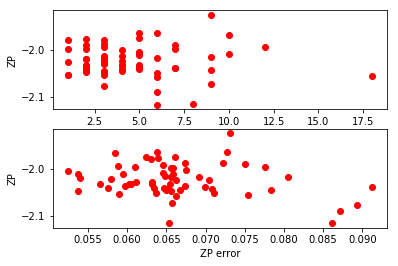

Maximum number of neighbors?: 5
Maximum standard deviation?:0.065
18 final calibration stars.
Mean, median zero point and standard deviation:
-2.02102971144 -2.02879613095 0.0243649129442


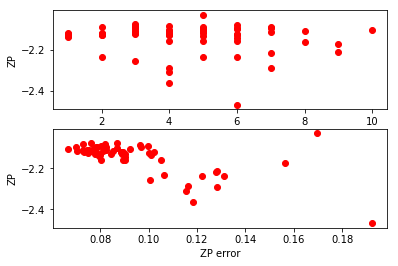

Maximum number of neighbors?: 5
Maximum standard deviation?:0.1
17 final calibration stars.
Mean, median zero point and standard deviation:
-2.12187331396 -2.12256521739 0.00737345375311


In [5]:
calibration.find_zp('I1', verbose=0, data_dir=folder)
calibration.find_zp('I2', verbose=0, data_dir=folder)

In [6]:
calibration.apply_calibration('I1', -2.02, data_dir=folder)
calibration.apply_calibration('I2', -2.11, data_dir=folder)

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

##  Generate MIR light curves matching optical ID numbers  

In [46]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

In [49]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

V27 not found.
V30 not found.
V46 not found.
V52 not found.
V53 not found.
V54 not found.
V55 not found.
V60 not found.
V61 not found.
V62 not found.
V63 not found.
V64 not found.
V66 not found.
V69 not found.
V72 not found.
V80 not found.
V84 not found.


#### Create figure with all bands phased together

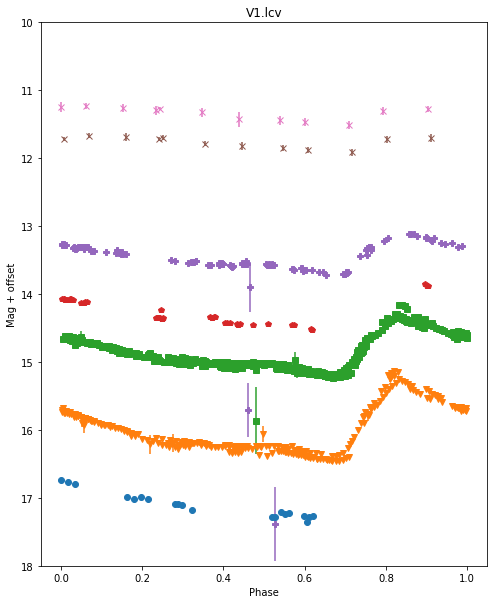

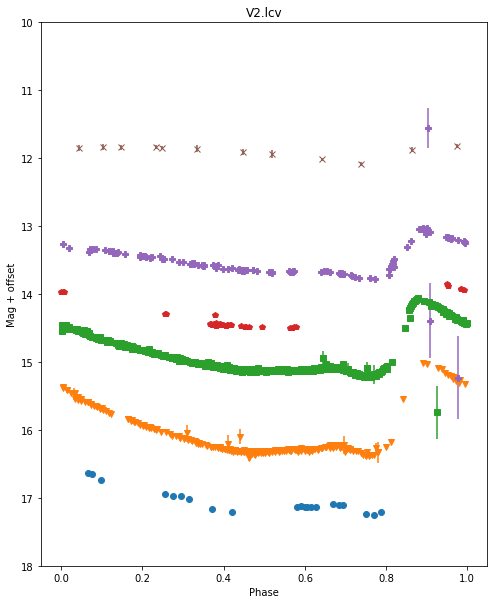

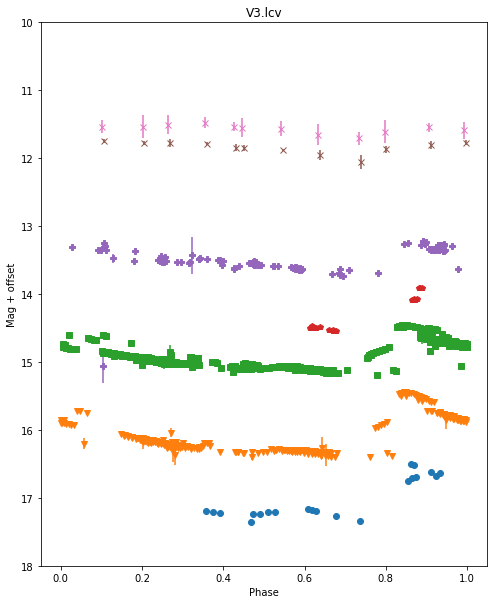

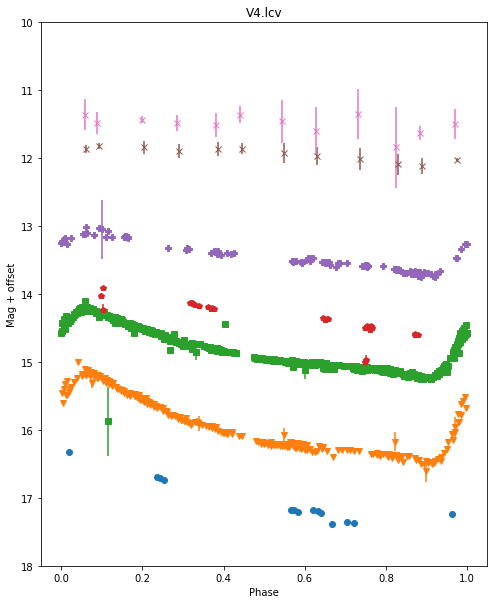

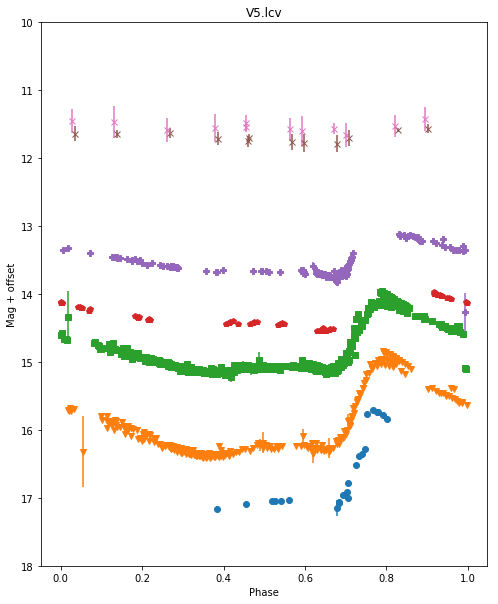

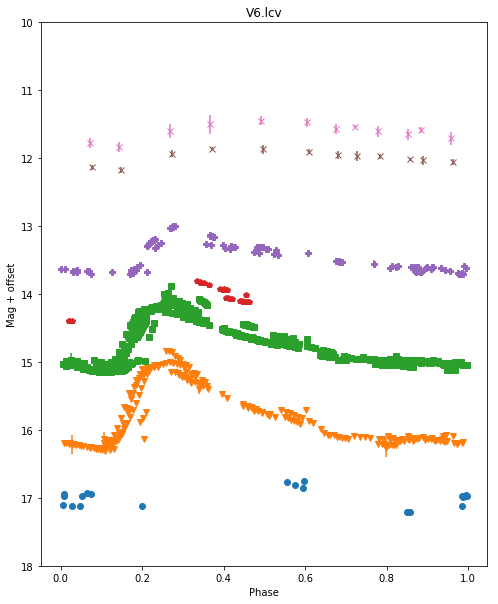

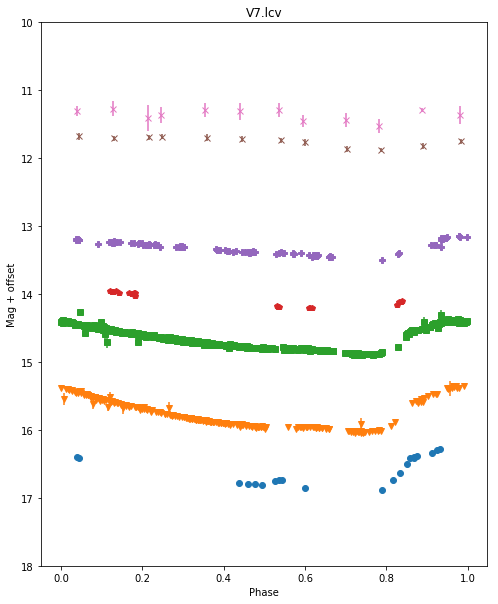

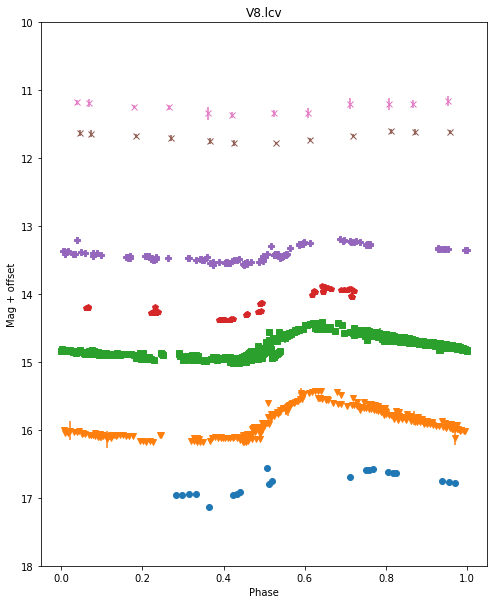

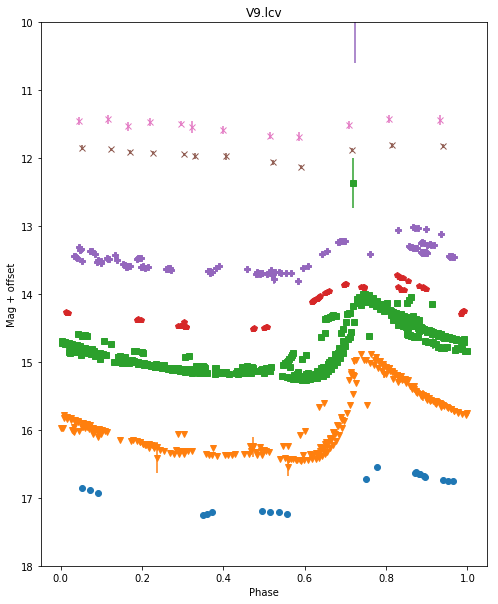

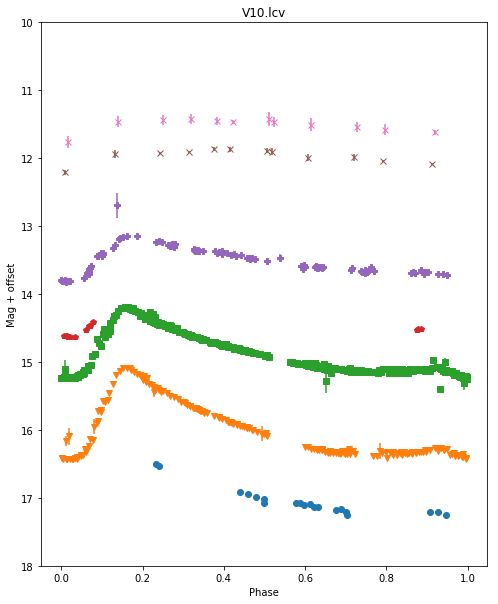

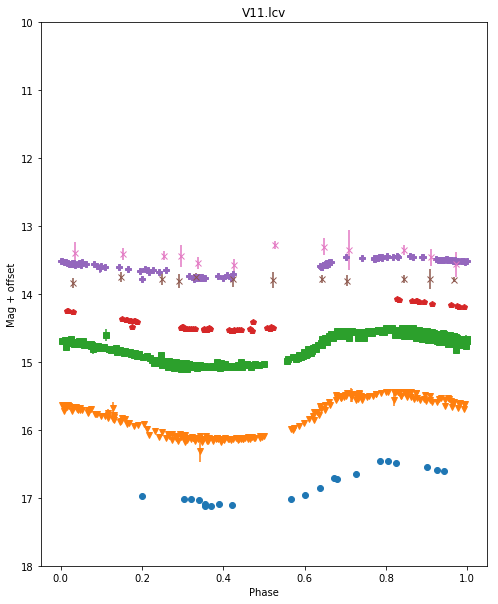

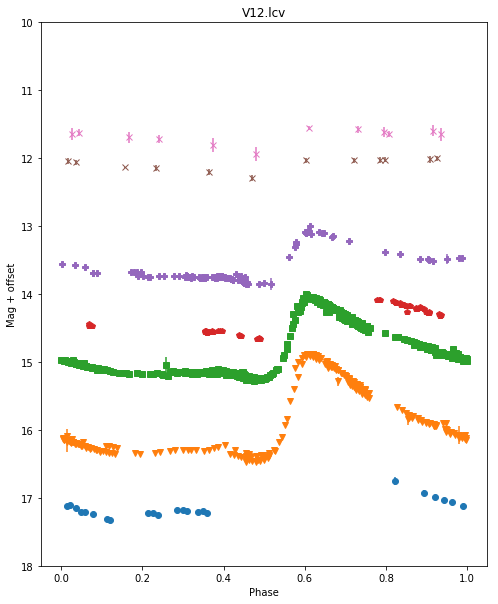

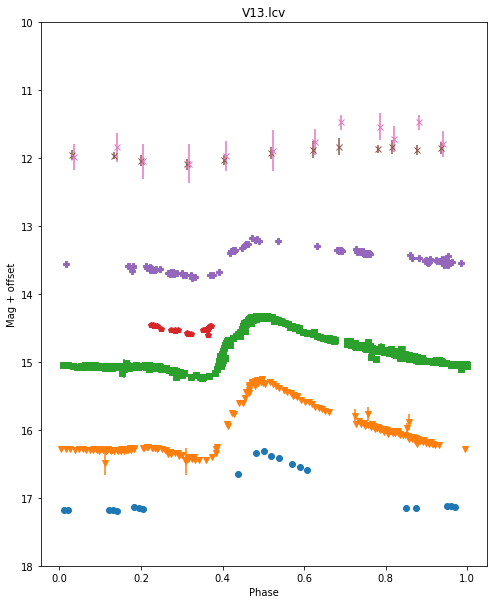

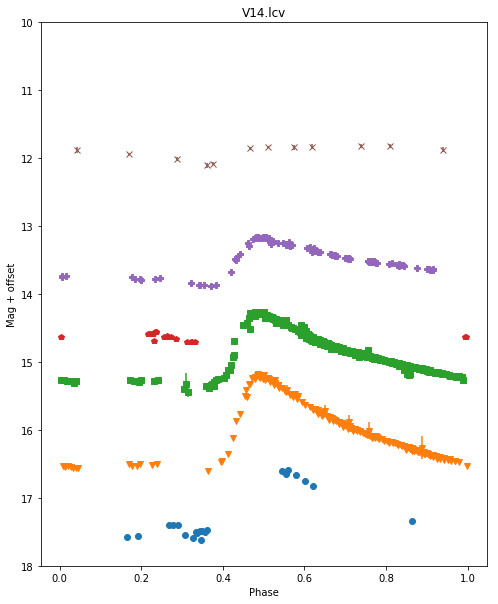

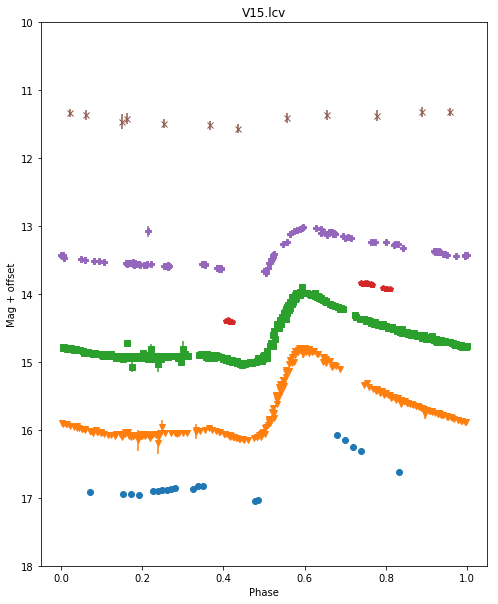

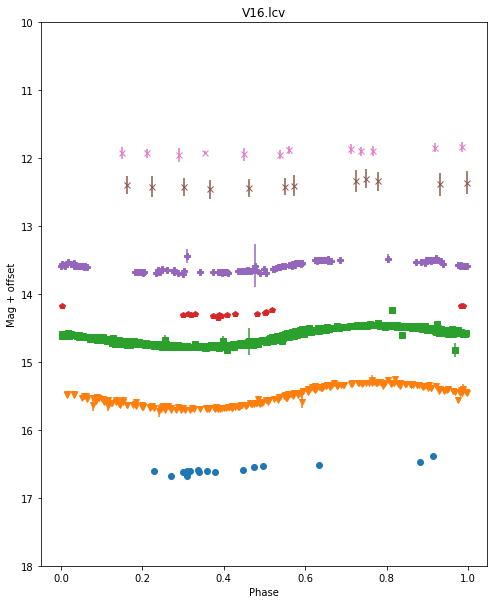

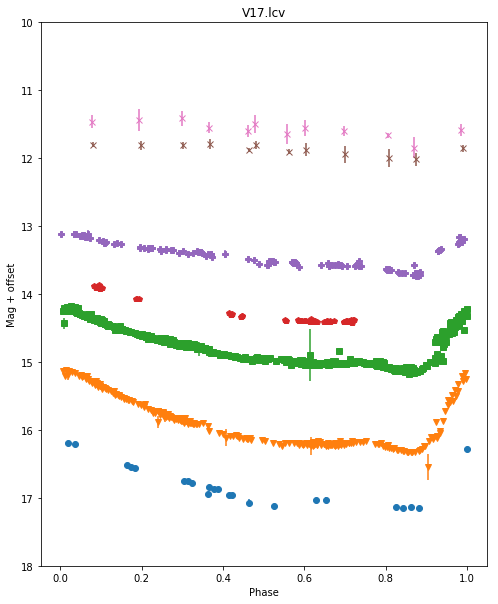

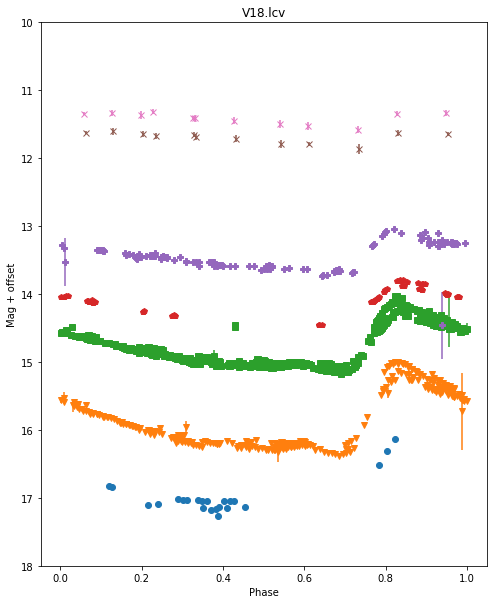

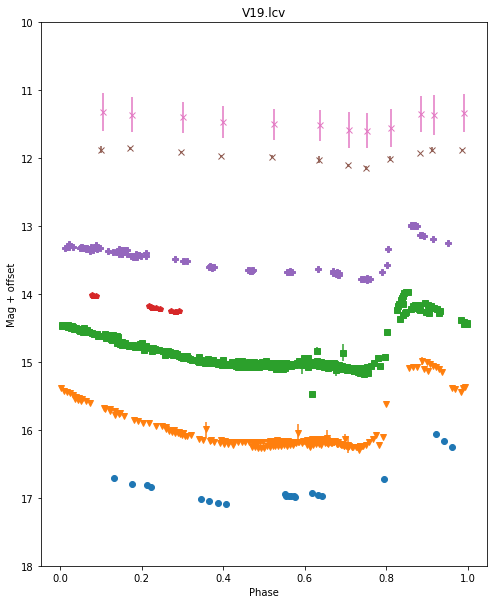

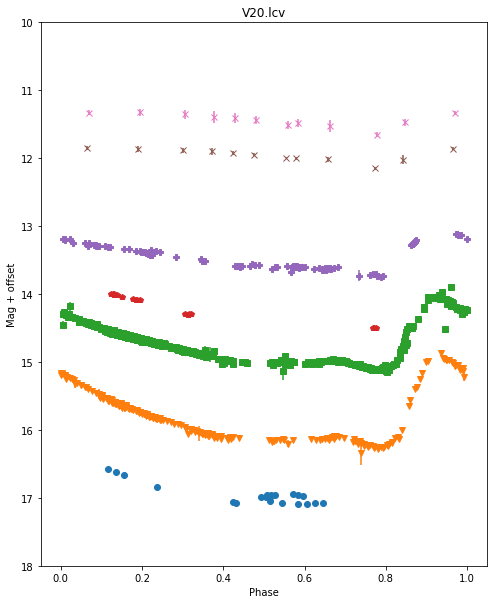

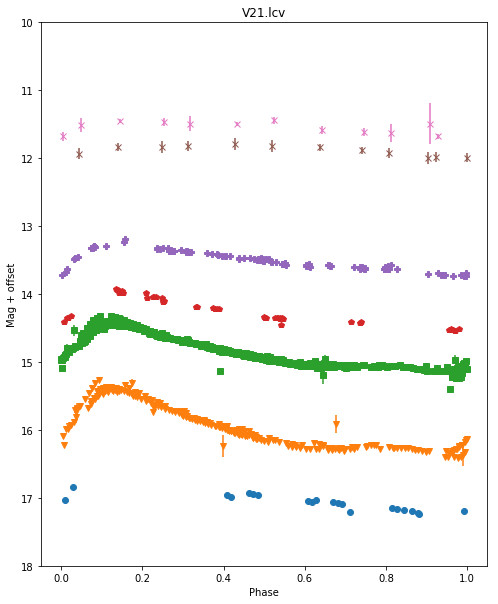

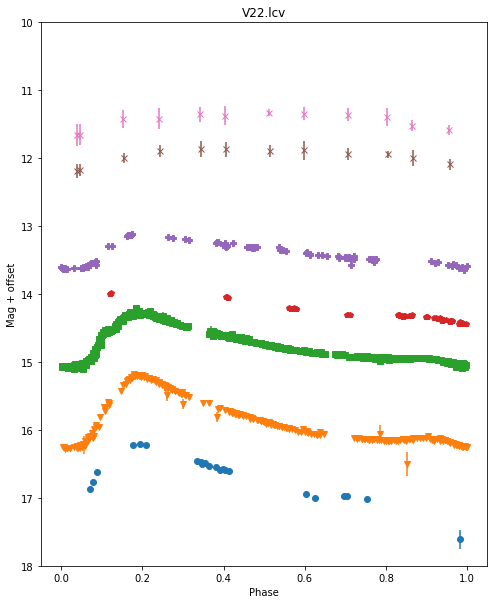

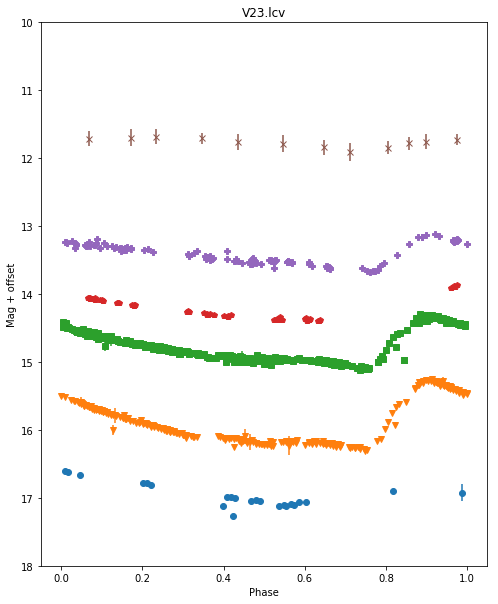

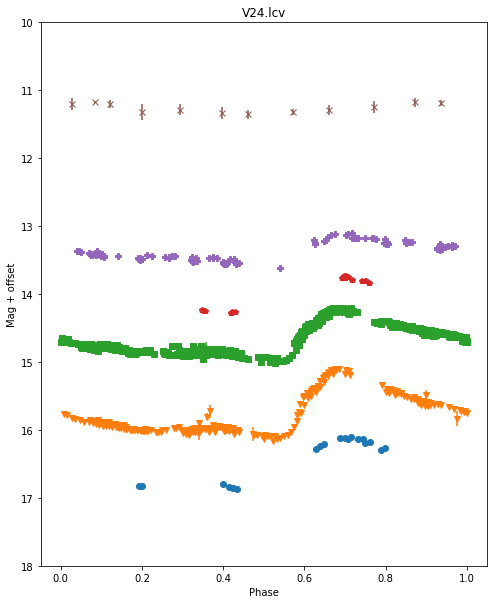

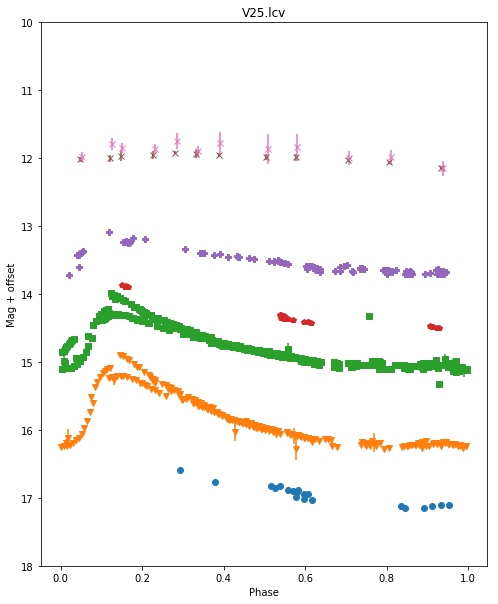

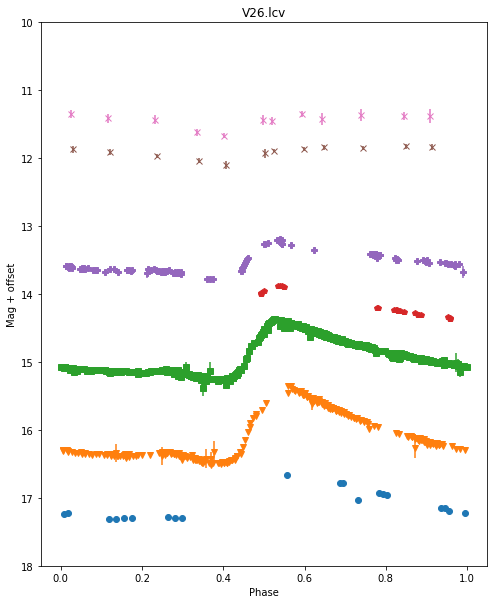

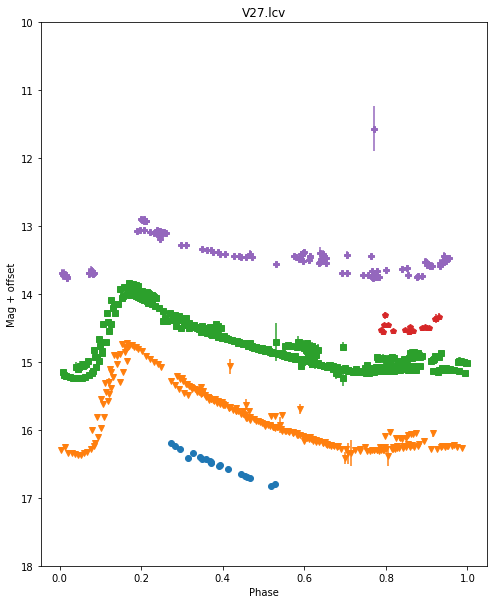

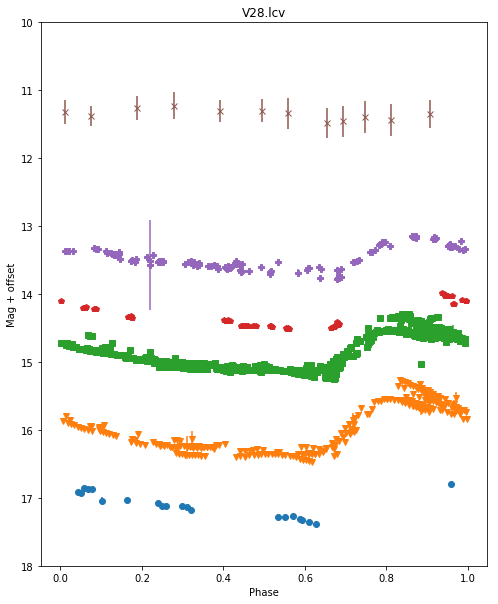

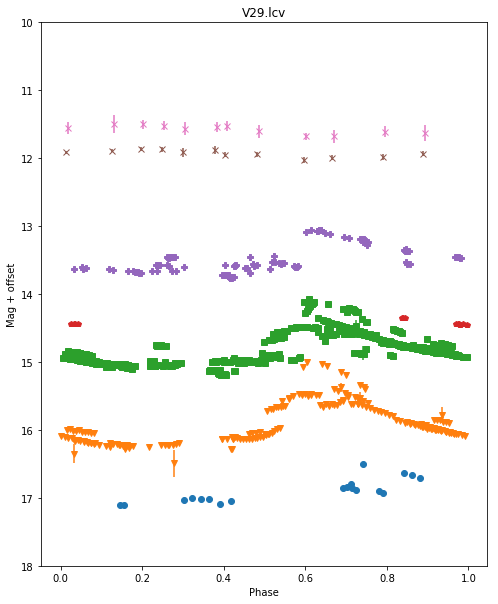

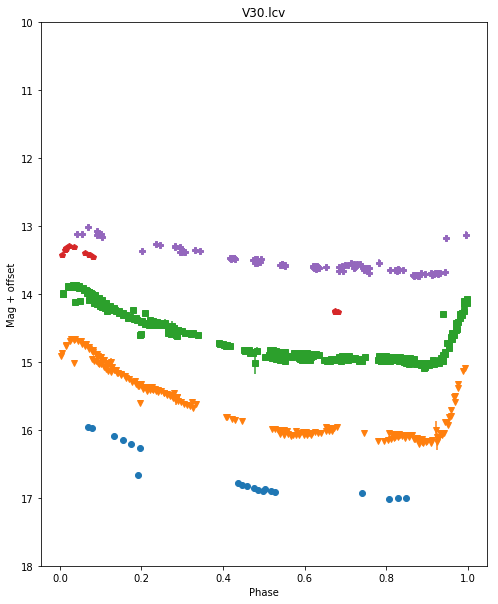

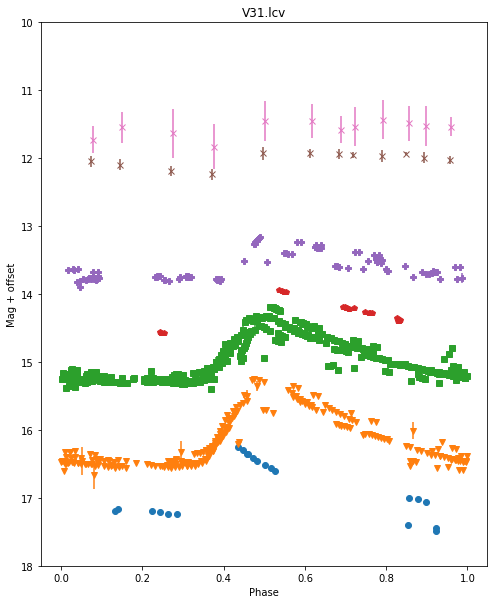

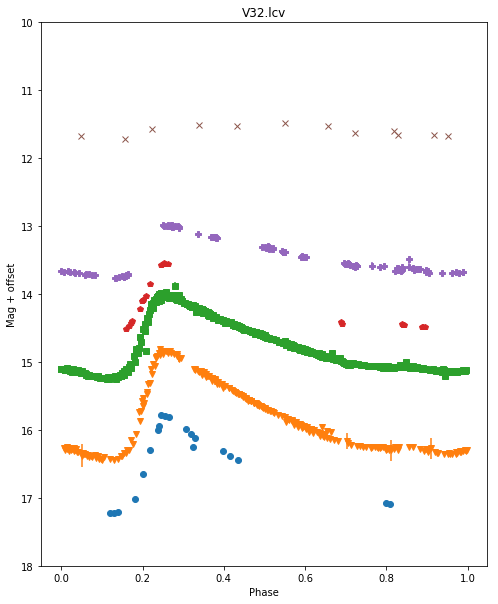

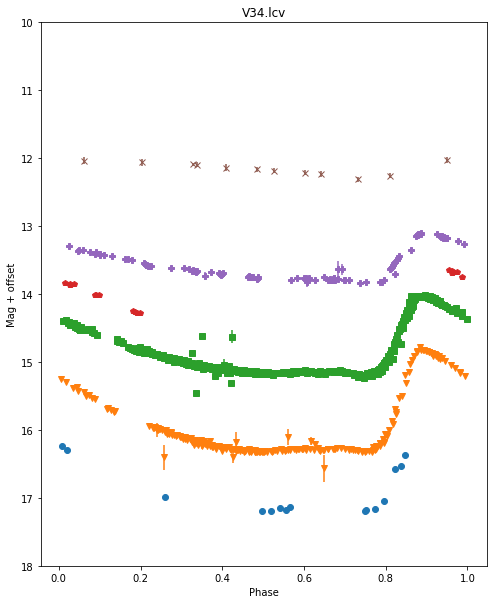

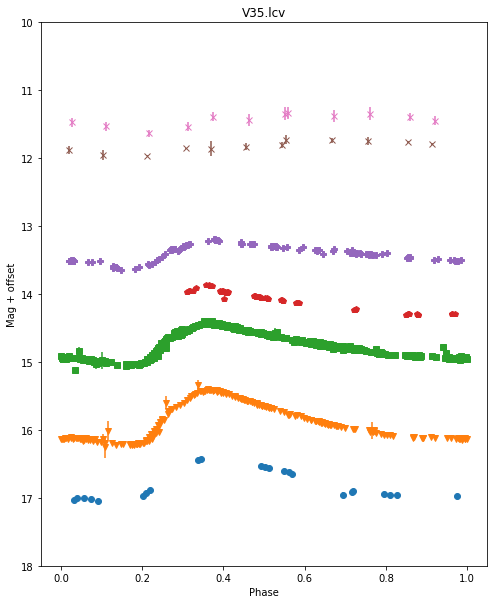

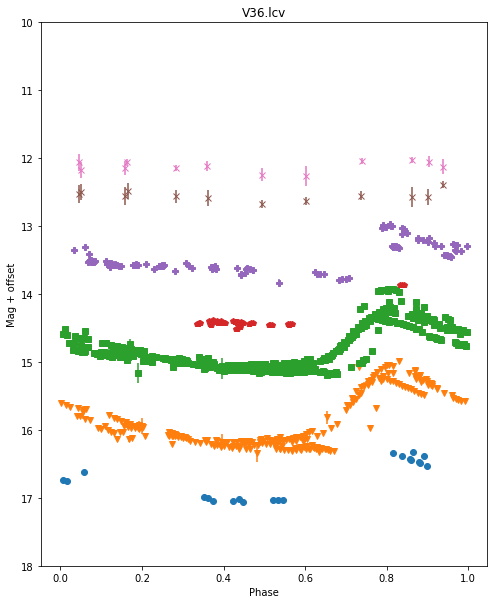

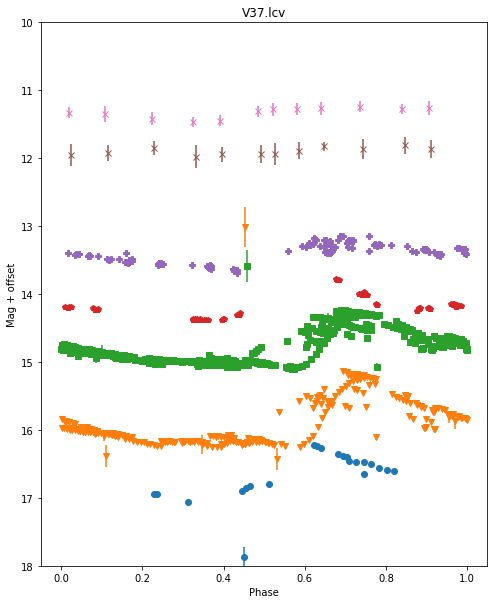

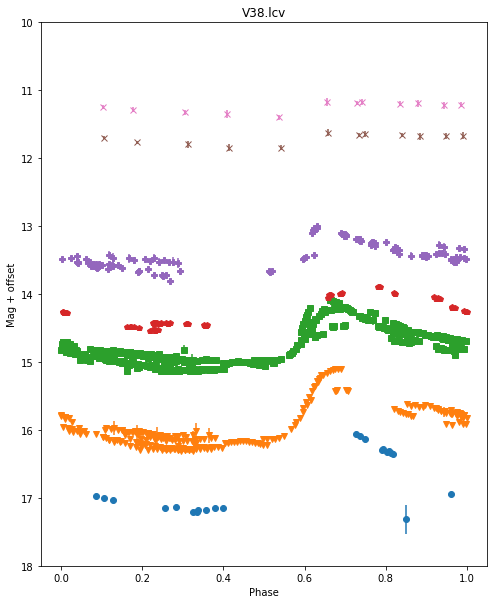

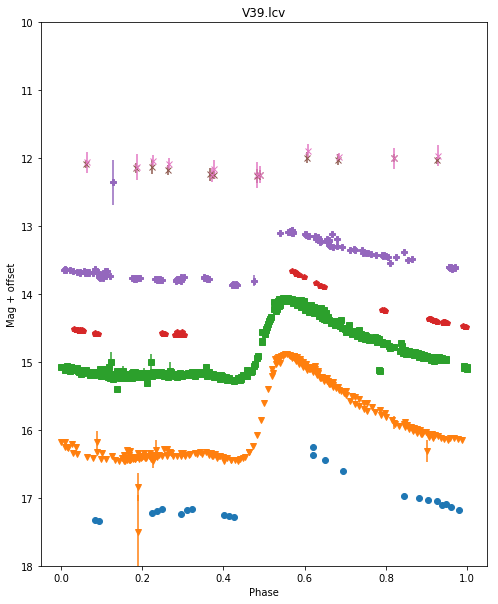

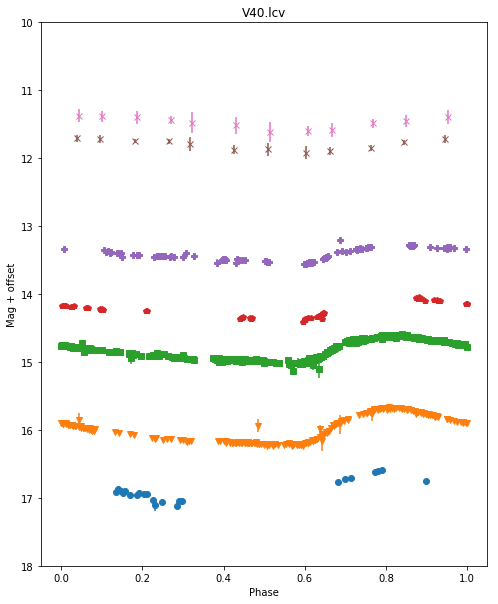

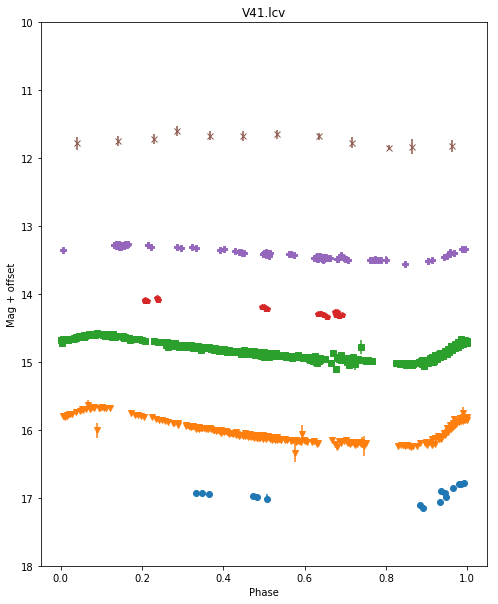

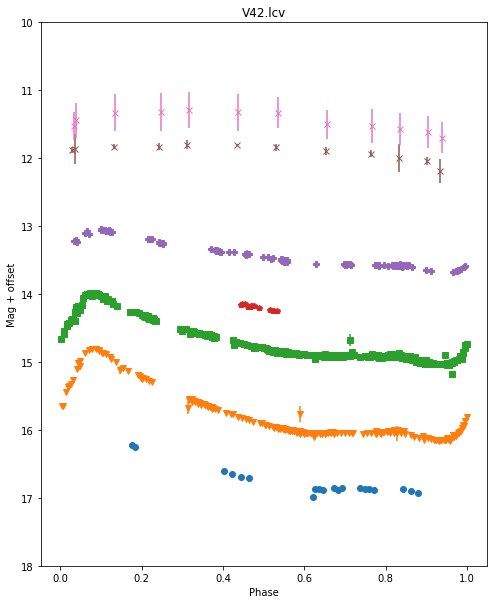

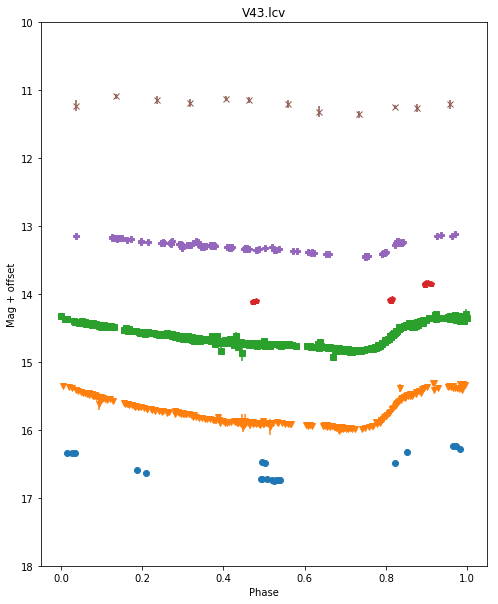

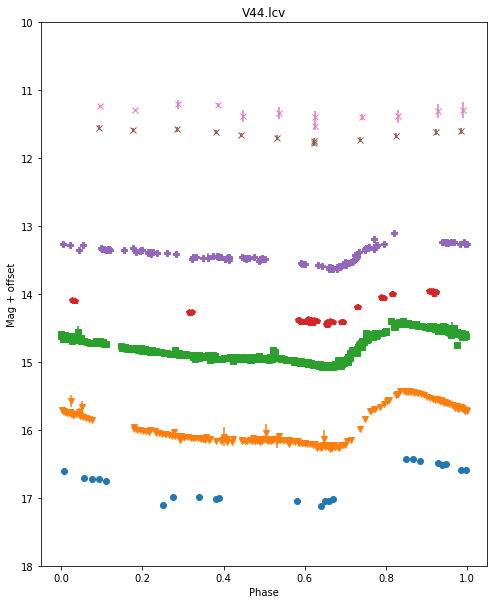

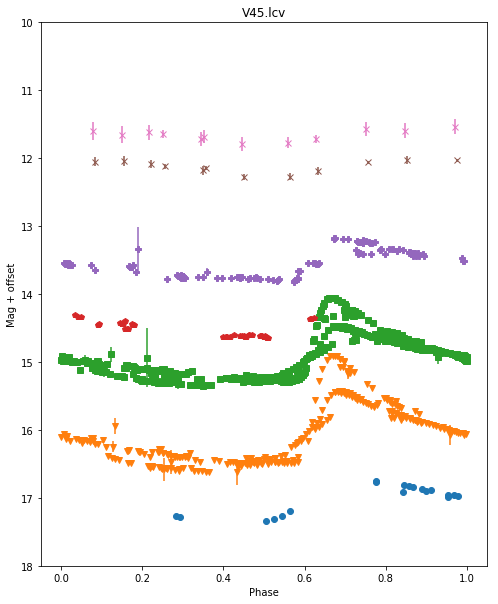

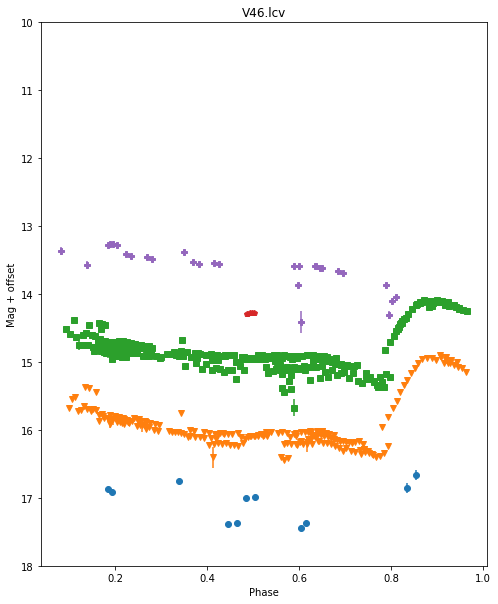

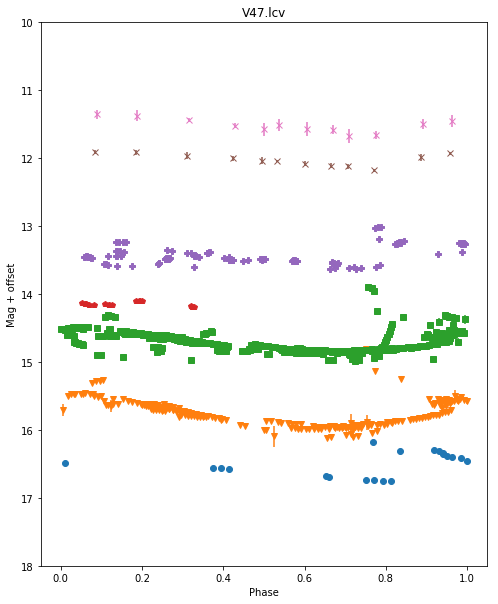

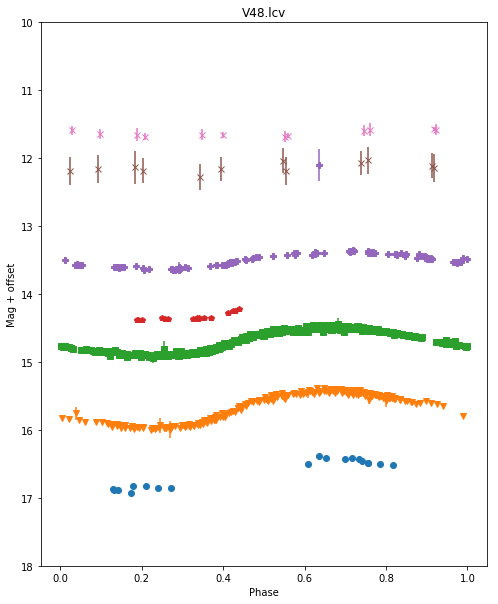

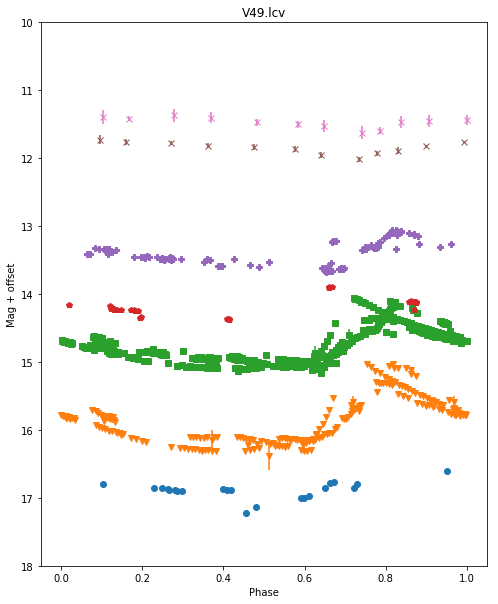

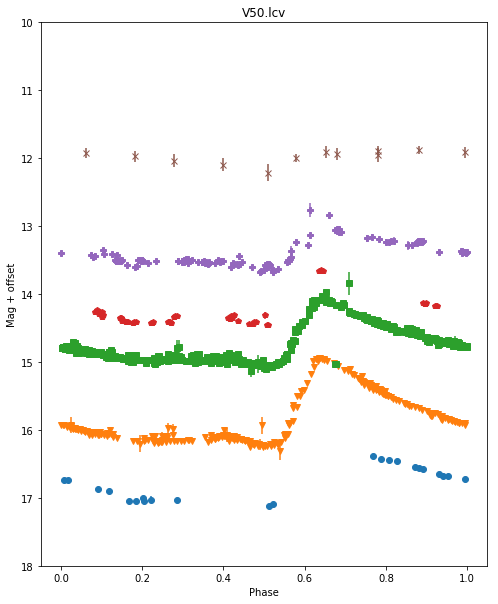

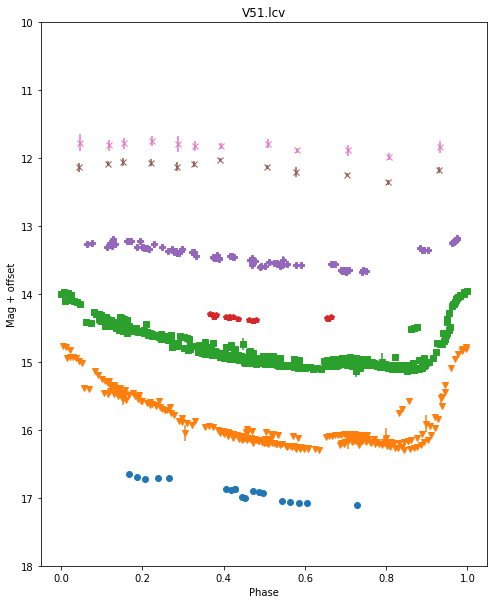

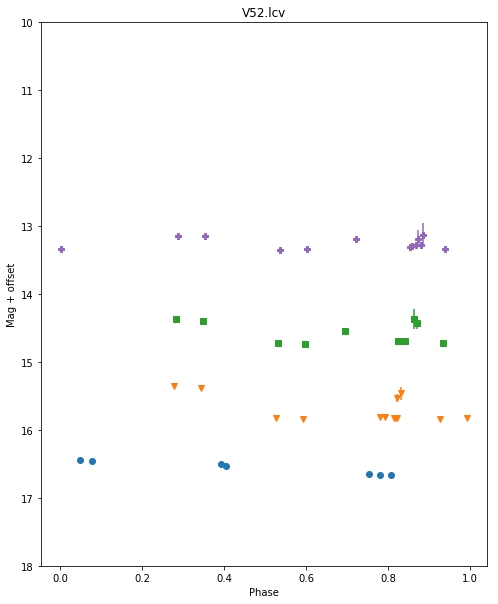

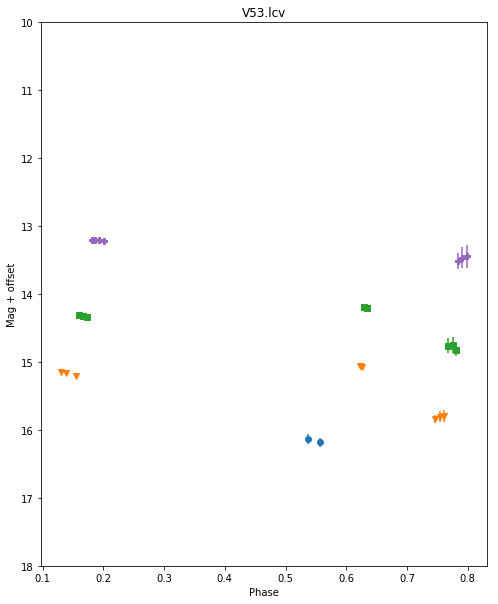

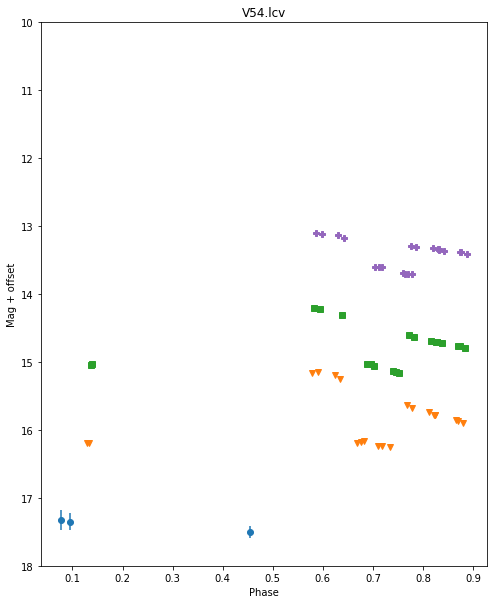

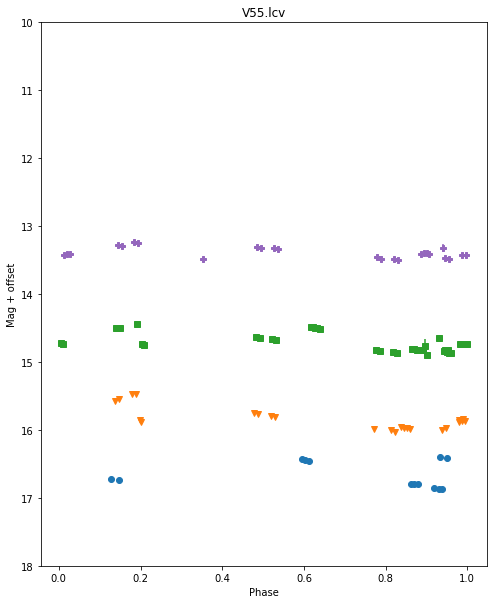

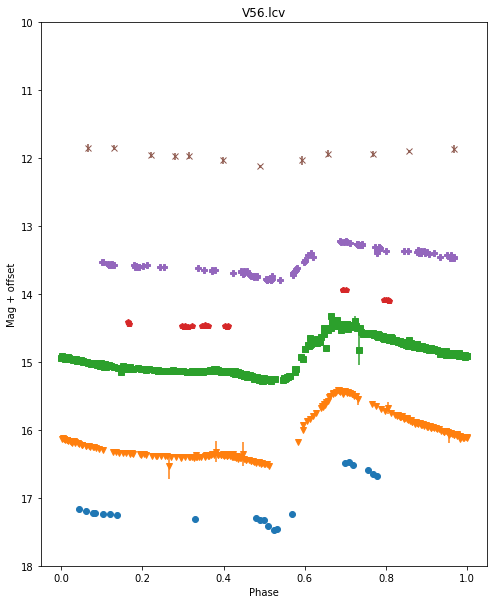

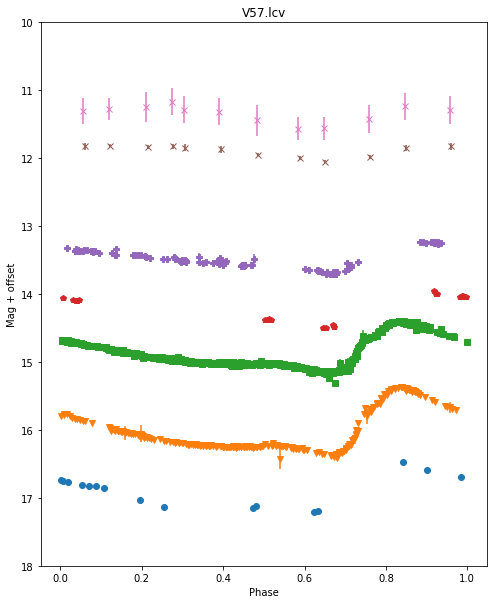

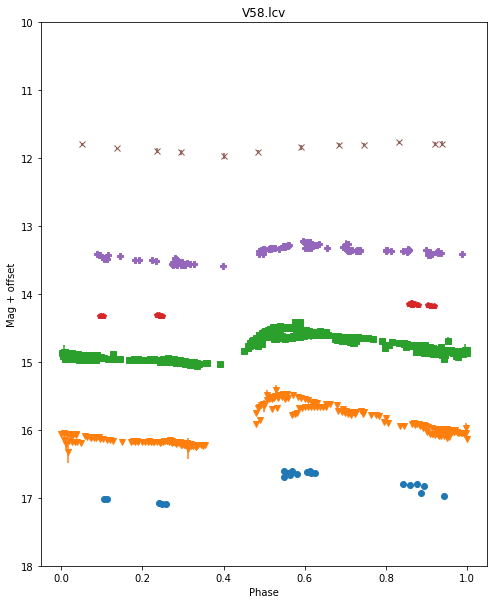

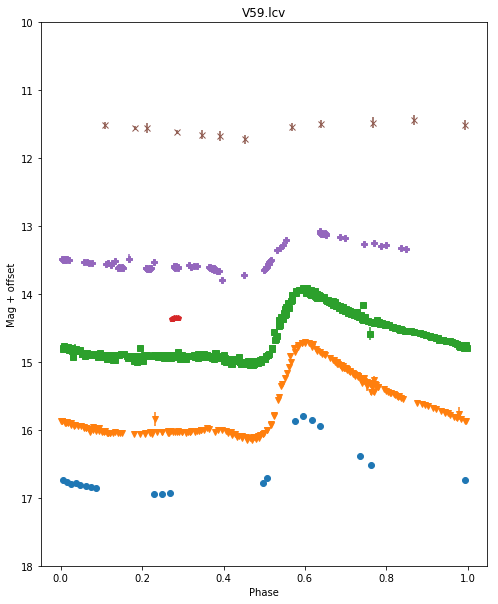

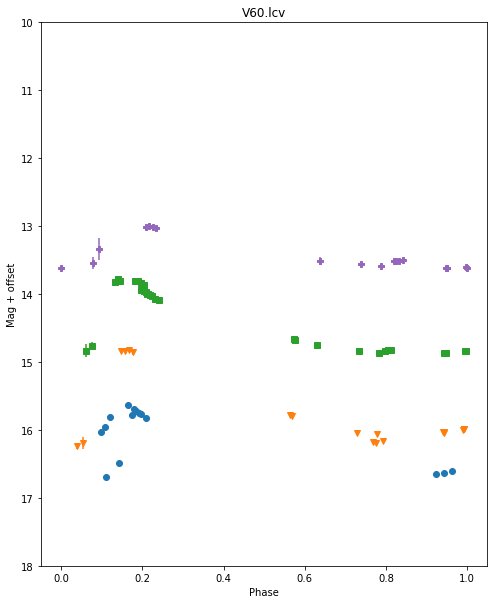

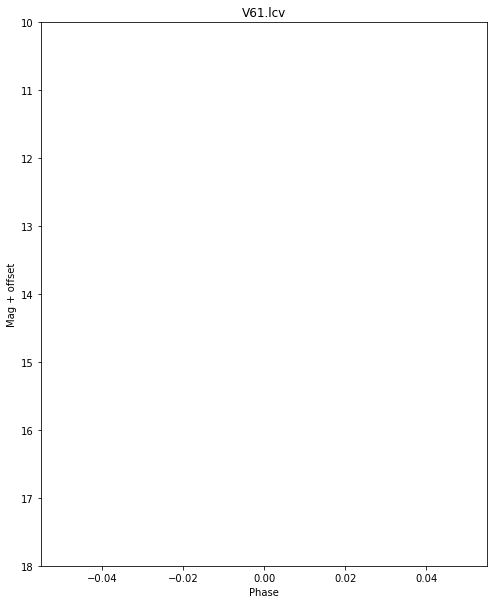

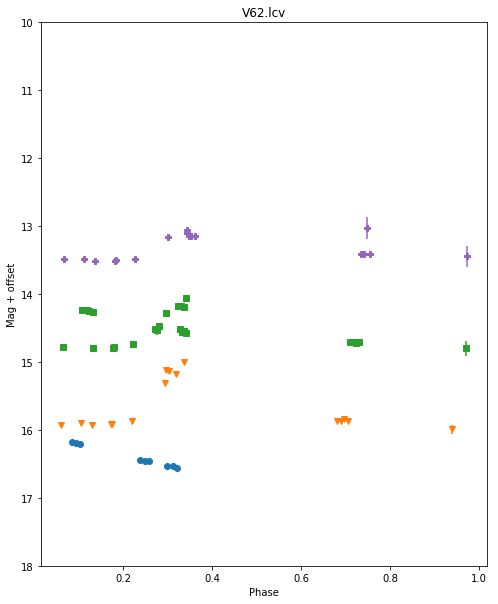

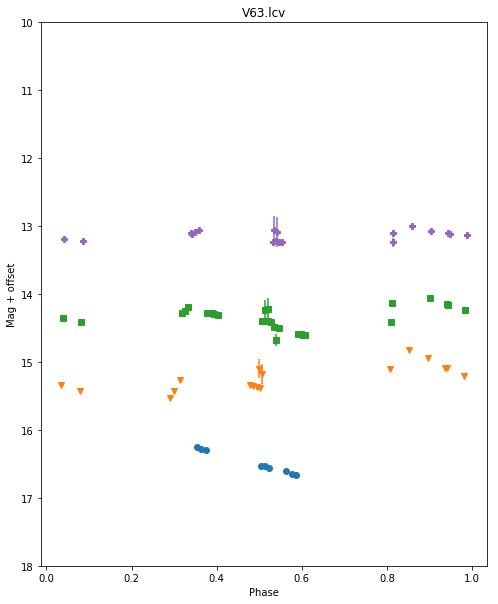

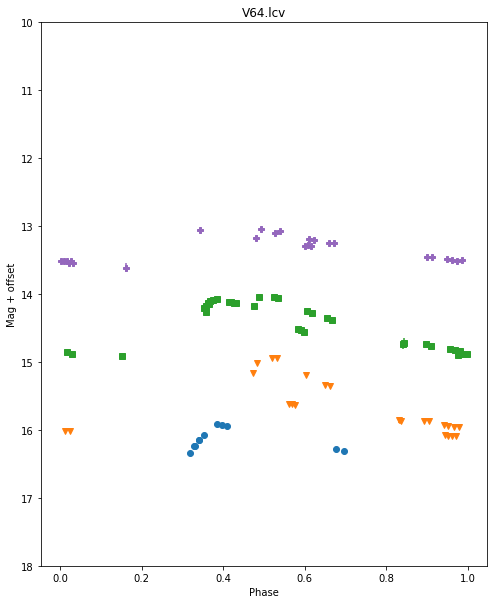

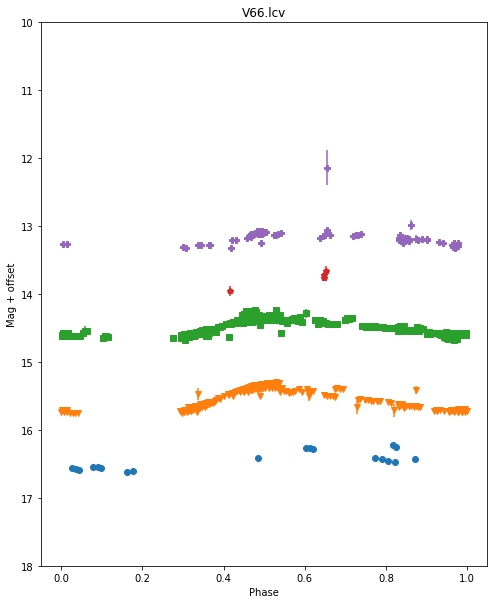

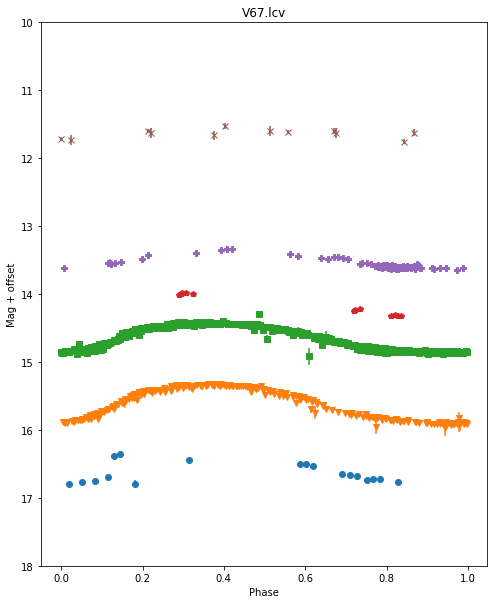

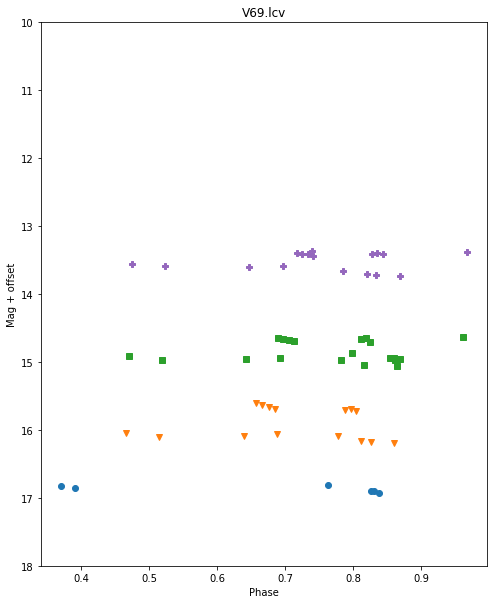

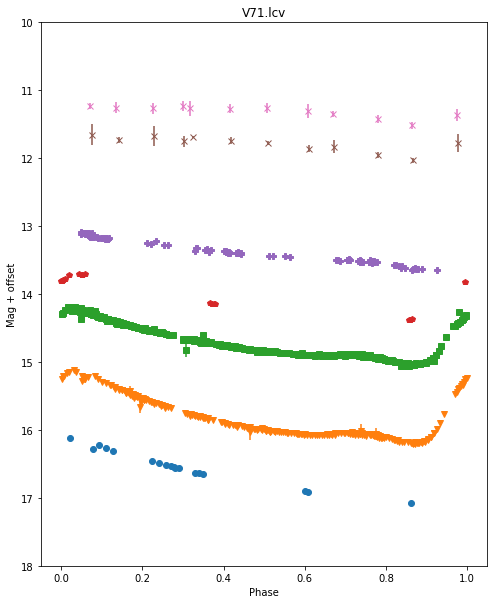

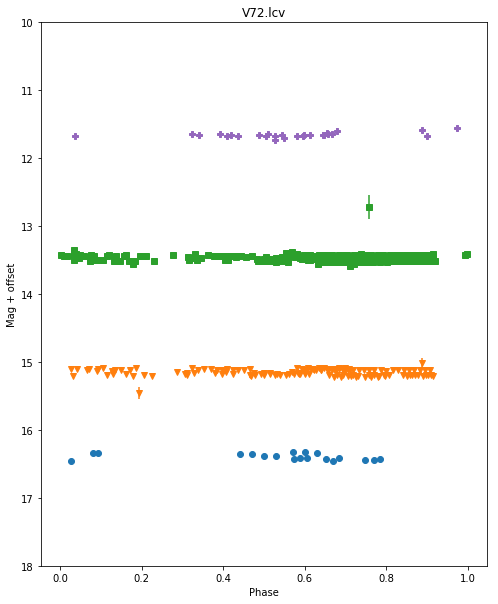

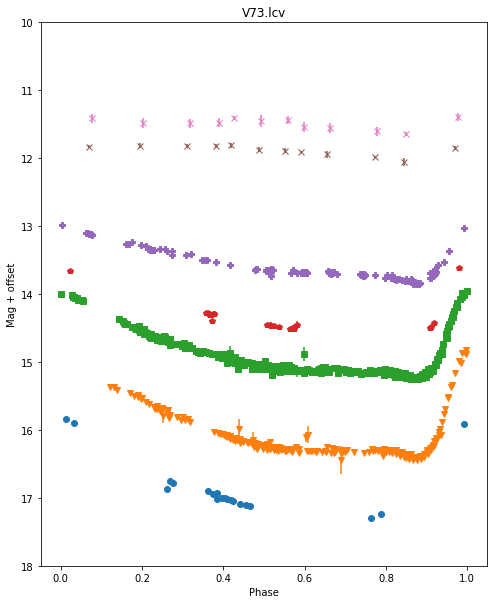

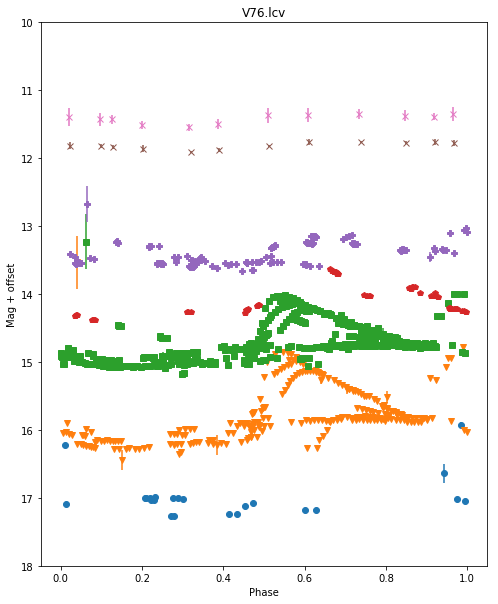

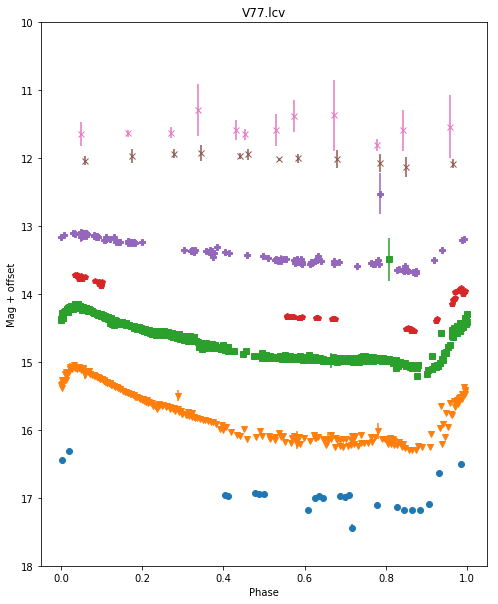

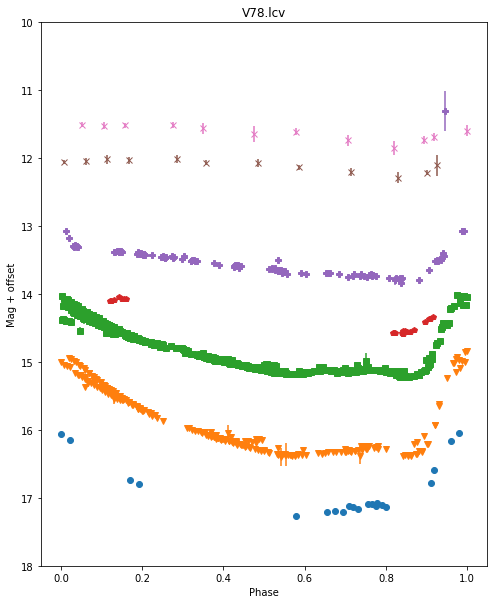

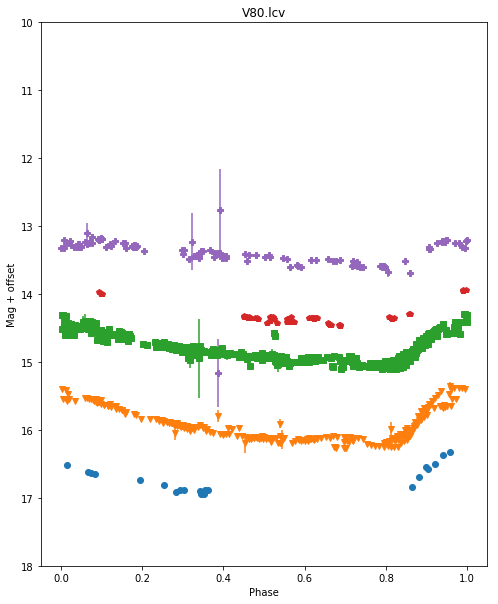

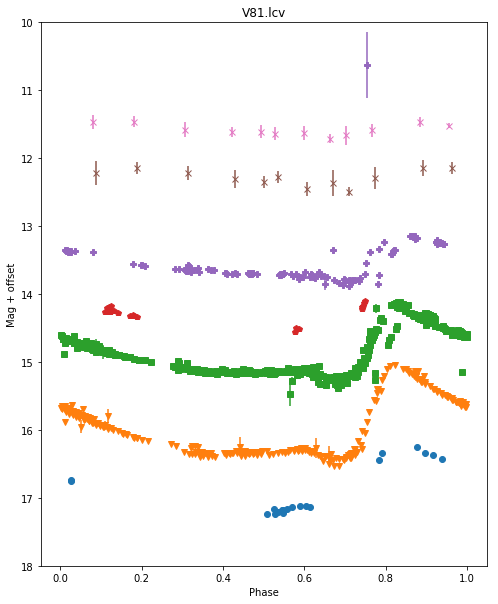

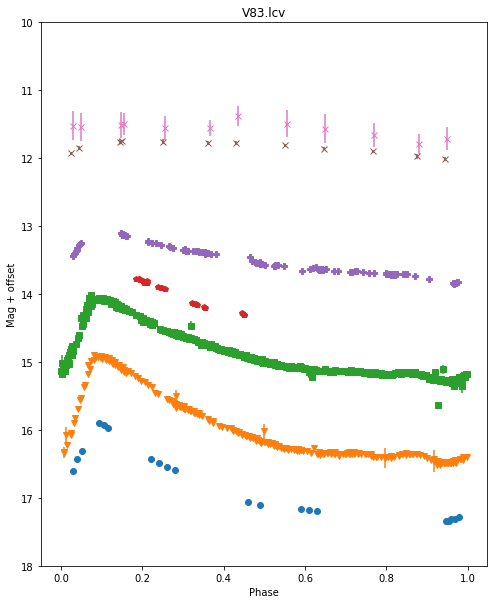

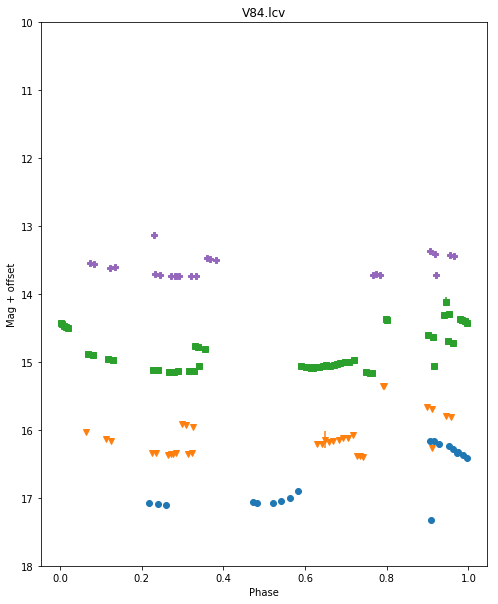

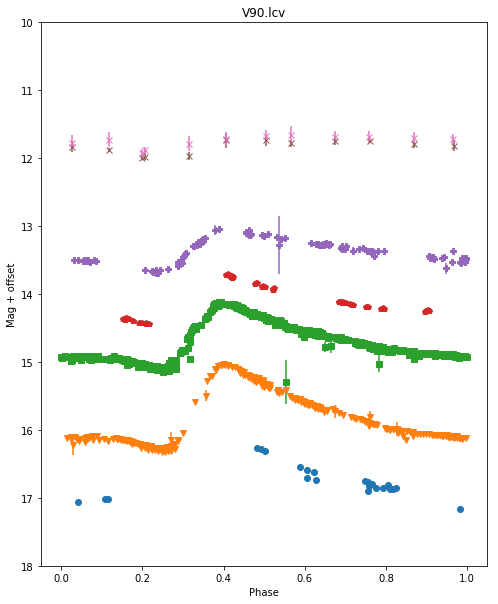

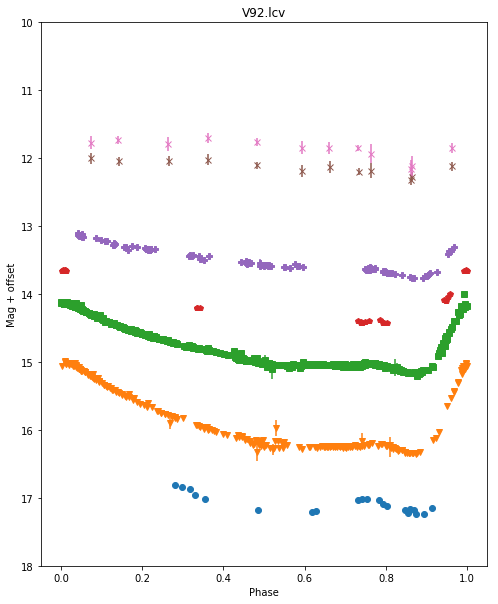

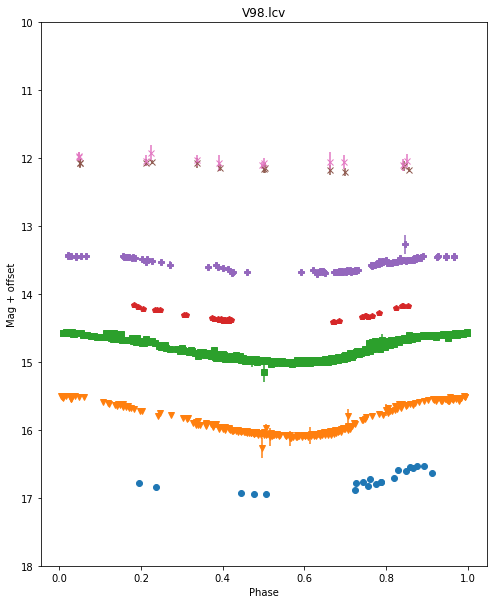

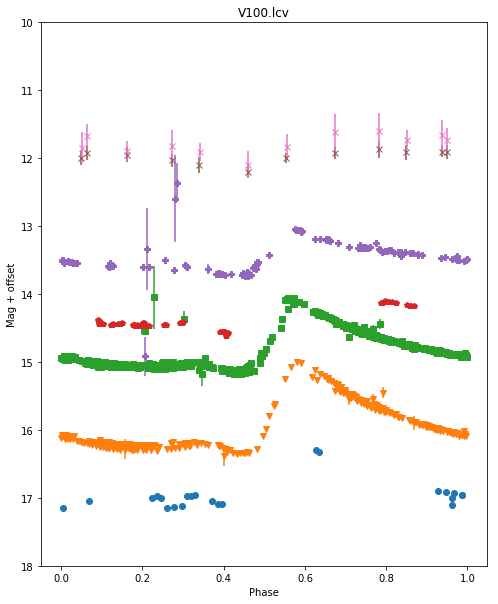

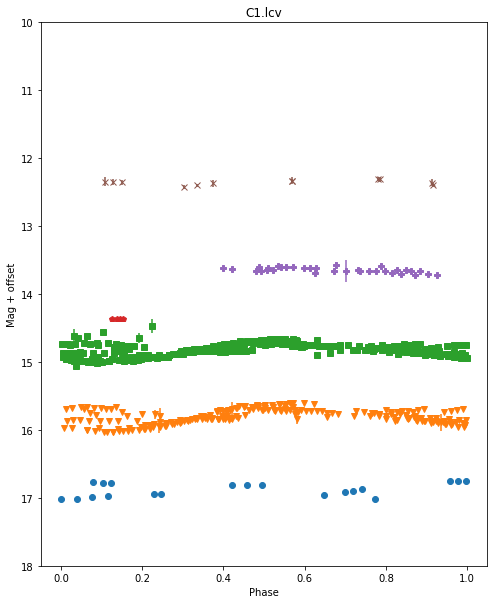

In [51]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder)
    except:
        print star, ' not found.'
        continue

## Fit light curves

/Volumes/Annie/CRRP/NGC3201/lcvs/V10.phased


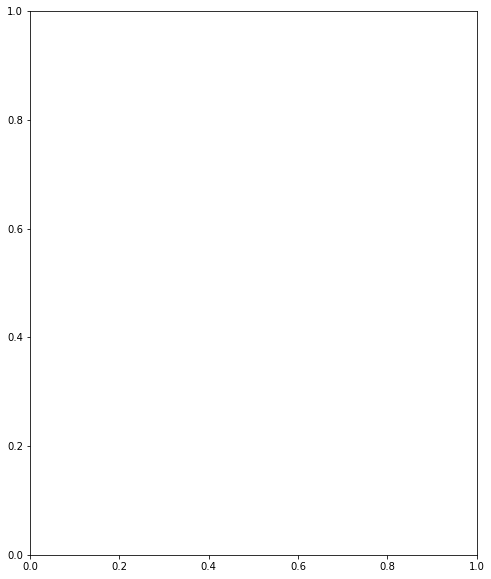

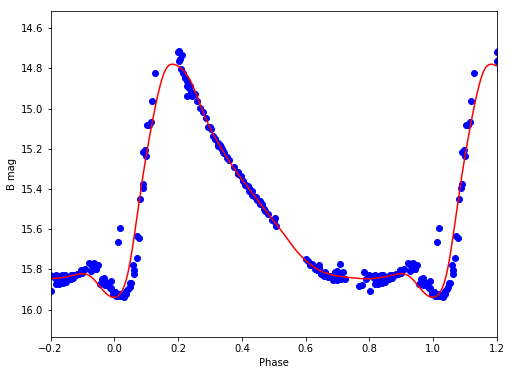

Are you happy with this fit? [y/n]: y
B 15.4545057697 1.15917052605


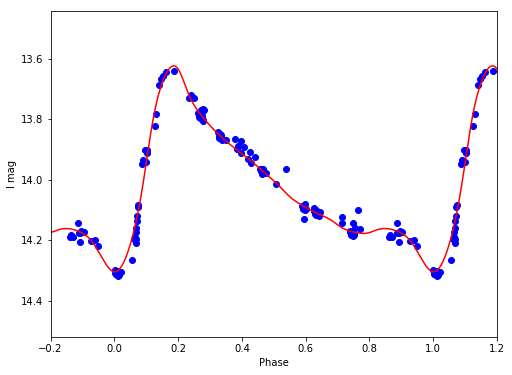

Are you happy with this fit? [y/n]: y
I 14.0046426095 0.679329755245


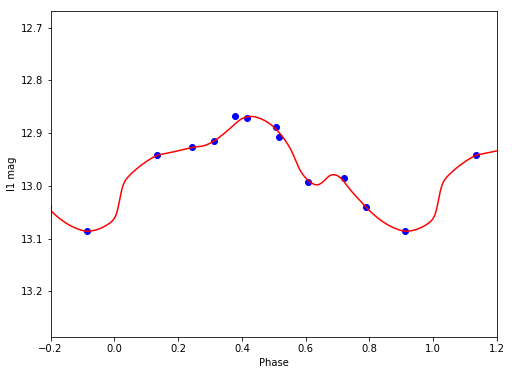

Are you happy with this fit? [y/n]: n
Enter new smoothing parameter: 0.2


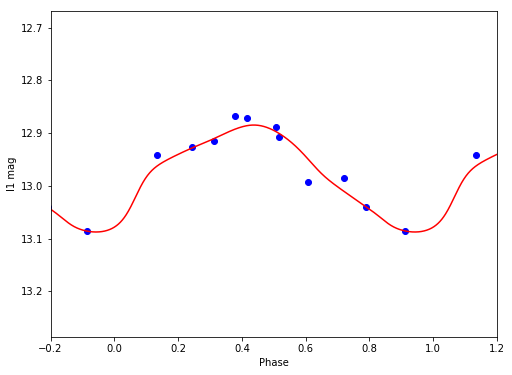

Are you happy with this fit? [y/n]: y
I1 12.9753945885 0.202649967201


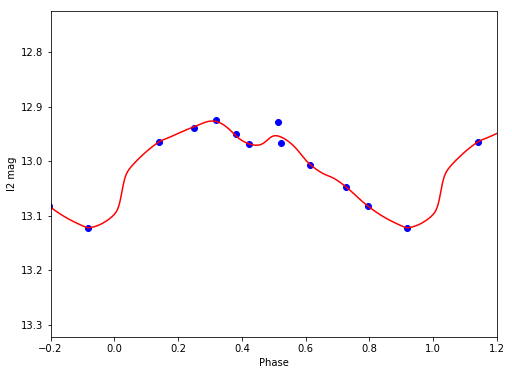

Are you happy with this fit? [y/n]: n
Enter new smoothing parameter: 0.2


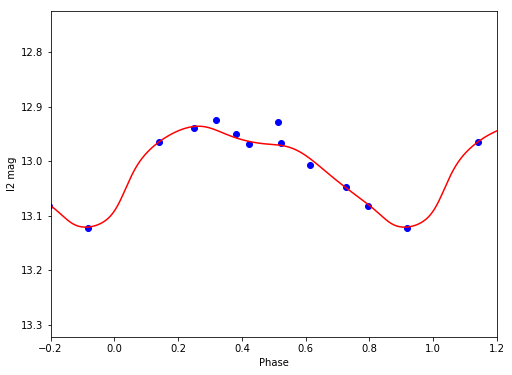

Are you happy with this fit? [y/n]: y
I2 13.0098955171 0.185092440405


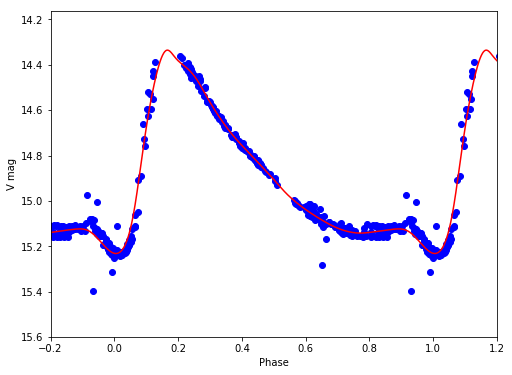

Are you happy with this fit? [y/n]: y
V 14.8556102376 0.895952769822
['U' 'B' 'V' 'R' 'I' 'J' 'H' 'K' 'I1' 'I2']
[         nan  15.45450577  14.85561024          nan  14.00464261   0.           0.
   0.          12.97539459  13.00989552]
[        nan  1.15917053  0.89595277         nan  0.67932976  0.          0.
  0.          0.20264997  0.18509244]
[ nan  0.1  0.1  nan  0.1  0.   0.   0.   0.2  0.2]


In [22]:
#f = open(folder+'avg_mags_test.txt', 'a')
star = 'V10'
#for ind, star in enumerate(stars):
    
r1, r2, r3, r4 = lightcurves.gloess(folder+'lcvs/'+star+'.phased', plot_save=1, clean=1)
#datasave = np.array(zip(np.repeat(star, len(r1)), r1, np.repeat(data['new_period'][ind], len(r1)), r2, r3, r4), dtype=[('c1', 'S3'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float)])
#np.savetxt(f, datasave, fmt='%3s %2s %10.8f %6.3f %4.2f %4.2f')
print r1
print r2
print r3
print r4
#f.close()